In [20]:
# Update the databases information
import csv
import requests
import pandas as pd

url = "https://api.us.socrata.com/api/catalog/v1"
csv_file_path = 'dataset.csv'

with open(csv_file_path, mode ='r')as file:
  csvFile = csv.reader(file)
  city_data = {}
  for lines in csvFile:
        if lines[4] == "website":
           continue
        url_city = lines[4]
        city = lines[5]
        city_data[city] = url_city

for k,v in city_data.items():
    try:
      params = {
      "domains": v,
      "search_context": v,
      "limit": 5000
      }
      response = requests.get(url, params=params)
      data = response.json()
      count = len(data["results"])
      print(str(k) + "\tCount:" + str(count))
      df = pd.read_csv(csv_file_path)

      city_name_to_update = str(k)
      new_database_num = int(count)

      df.loc[df['city name long'] == city_name_to_update, 'databases'] = new_database_num
      df.loc[df['city name long'] == city_name_to_update, 'yes'] = 1

      df.to_csv(csv_file_path, index=False)
    except Exception as e:
        print(str(k) + "\tERROR")
        df = pd.read_csv(csv_file_path)

        city_name_to_update = str(k)
        new_database_num = int(count)

        df.loc[df['city name long'] == city_name_to_update, 'yes'] = int(0)
        df.to_csv(csv_file_path, index=False)


Austin, TX	Count:19
Baltimore, MD	ERROR
Chicago, IL	Count:1659
De Leon, TX	ERROR
Edmonton, AB	Count:2150
New Orleans, LA	Count:234
San Francisco, CA	Count:1205
Seattle, WA	Count:859
New York City, NY	Count:3441
Honolulu, HI	Count:358
Somerville, MA	Count:42
Boston, MA	ERROR
Salt Lake City, UT	ERROR
Oakland, CA	ERROR
Madison, WI	ERROR
Kansas City, MO	Count:416
Raleigh, NC	ERROR
Redmond, WA	Count:47
Weatherford, TX	ERROR
Wellington, FL	ERROR


In [21]:
# Table 1
import pandas as pd

csv_file_path = 'dataset.csv'

data = {'City Name': [],
        'No. of data sets in 2023': [],
        'No. of data sets in 2014': [],
        'Change in No. of data sets': [],
        'Status':[],
        'Top_three categories':[]
       }

with open(csv_file_path, mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
      if lines[1] == "databases":
          continue
      if lines[1] == "0":
          data["Status"].append("Website disappeared")
          data["Top_three categories"].append("N/A")
      elif lines[3] == "0":
          data["Status"].append("Website not connectable")
          data["Top_three categories"].append("N/A")
      else:
          data["Status"].append("Website is working")
          url = "https://api.us.socrata.com/api/catalog/v1"
          domain = lines[4]

          params = {
              "domains": domain,
              "search_context": domain,
              "limit": 5000
          }

          response = requests.get(url, params=params)
          data2 = response.json()
          categories = {}
          for item in data2['results']:
              for c in item["classification"]["categories"]:
                if c in categories:
                    categories[c] += 1
                else:
                    categories[c] = 1
          sorted_data = sorted(categories.items(), key=lambda x: x[1], reverse=True)
          top_three_names = [category for category, value in sorted_data[:3]]
          res = ','.join(top_three_names)
          data["Top_three categories"].append(res)

      data["City Name"].append(lines[5])
      data["No. of data sets in 2023"].append(int(lines[1]))
      data["No. of data sets in 2014"].append(int(lines[6]))
      data["Change in No. of data sets"].append(int(lines[1]) - int(lines[6]))

df = pd.DataFrame(data)

df_sorted_desc = df.sort_values(by='No. of data sets in 2023', ascending=True)
df_sorted_desc = df_sorted_desc.reset_index(drop=True)
df_sorted_desc['S. No.'] = df_sorted_desc.index + 1
df_sorted_desc = df_sorted_desc[['S. No.', 'City Name', 'No. of data sets in 2023',"No. of data sets in 2014","Change in No. of data sets",'Top_three categories','Status']]
print(df_sorted_desc.to_string(index=False))

 S. No.          City Name  No. of data sets in 2023  No. of data sets in 2014  Change in No. of data sets                          Top_three categories                  Status
      1     Wellington, FL                         0                        30                         -30                                           N/A     Website disappeared
      2    Weatherford, TX                         0                        71                         -71                                           N/A     Website disappeared
      3        De Leon, TX                         0                        12                         -12                                           N/A     Website disappeared
      4         Austin, TX                        19                       216                        -197                   health,economy,demographics      Website is working
      5 Salt Lake City, UT                        21                        39                         -18         

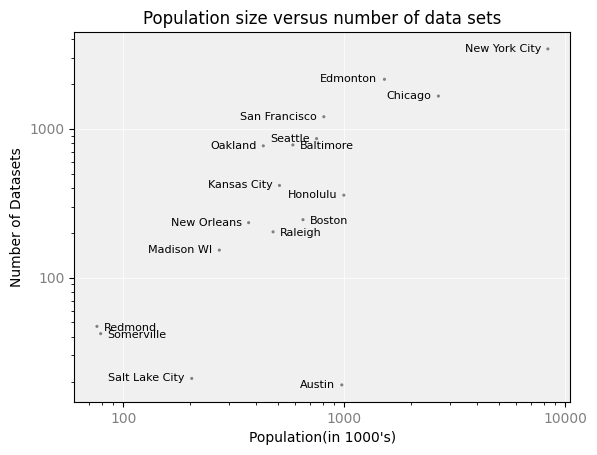

In [23]:
# FIG 1
import csv
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

csv_file_path = 'dataset.csv'

cities = []
population = []
datasets = []

with open(csv_file_path, mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
      if lines[1] == "databases":
          continue
      if lines[1] == "0":
          continue
      cities.append(lines[0])
      population.append(int(lines[2])  // 1000 )
      datasets.append(int(lines[1]))

plt.rcParams['axes.facecolor'] = '#f0f0f0'
plt.scatter(population, datasets, color='grey', label='Cities', s = 5, edgecolor='none', zorder=2)

plt.xlabel("Population(in 1000\'s)")
plt.ylabel('Number of Datasets')
plt.title('Population size versus number of data sets')

for i, city in enumerate(cities):
    if city == "Baltimore" or city == "Boston" or city == "Raleigh" or city == "Somerville" or city == "Redmond":
      plt.annotate(city, (population[i], datasets[i]), textcoords="offset points", xytext=(5, -3), ha='left', fontsize = 8)

    else:
      plt.annotate(city, (population[i], datasets[i]), textcoords="offset points", xytext=(-5, -2), ha='right', fontsize = 8)

plt.xscale('log')
plt.yscale('log')

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.xticks(color="grey")
plt.yticks(color="grey")
plt.grid( color='white', linestyle='-', linewidth=0.5)

plt.show()

In [24]:
# add domain into domains
import csv

csv_file_path = 'dataset.csv'

domains = []
cities_short = []
with open(csv_file_path, mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
      if lines[4] == "website" or lines[3] == "0":
          continue
      else:
          domains.append(lines[4])
          cities_short.append(lines[0])

In [25]:
# Extracting file type -- tabular vs others
import requests

for domain in domains:
  url = "https://api.us.socrata.com/api/catalog/v1"
  filename = domain.split('.')[1] + "_filetype.txt"

  params = {
      "domains": domain,
      "limit": 100,  # Maximum number of results per page
      "offset": 0    # Start at the beginning
  }

  with open(filename, 'w') as file:
      while True:
          response = requests.get(url, params=params)
          data = response.json()

          for item in data['results']:
              file.write(item['resource']['id'] + " - " + item['resource']['lens_view_type'] + " - " + str(item['resource']['blob_mime_type'])+"\n")

          if len(data['results']) < params['limit']:
              break  # Exit loop if no more results to fetch

          params['offset'] += params['limit']

Percentage of 'tabular' filetypes: 82.06%
Percentage of 'pdf' filetypes: 2.68%
Percentage of 'zip' filetypes: 5.93%
Percentage of 'other' filetypes: 9.32%


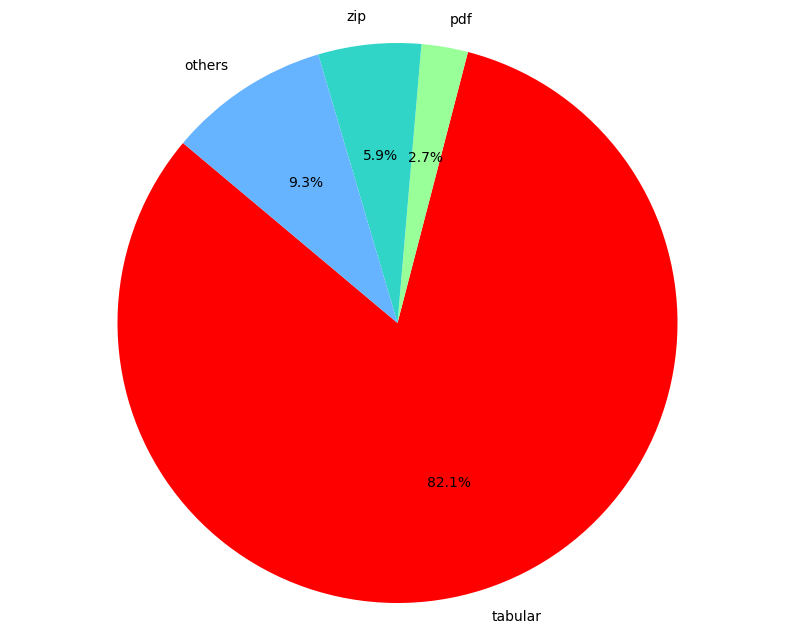

In [26]:
# FIG 2
# This code snippet reads the info from the txt file created in part 1, and creates the pie chart using matplotlib:

import matplotlib.pyplot as plt

total_count = 0
tabular_count = 0
pdf_count = 0
zip_count = 0
other_count = 0

cities = []
tabular_city_percent=[]

i = 0
for domain in domains:
  filename = domain.split('.')[1] + "_filetype.txt"
  tabular_city_count = 0
  total_city_count = 0

  with open(filename, 'r') as file:
      for line in file:
          total_count += 1
          total_city_count += 1
          if 'tabular' in line:
              tabular_count += 1
              tabular_city_count +=1
          elif 'pdf' in line:
              pdf_count += 1
          elif 'zip' in line:
              zip_count += 1
          else:
              other_count += 1
  cities.append(cities_short[i])
  tabular_city_percent.append(int(tabular_city_count)/int(total_city_count))
  i += 1
i = 0

tabular_percentage = (tabular_count / total_count * 100) if total_count else 0
zip_percentage = (zip_count / total_count * 100) if total_count else 0
pdf_percentage = (pdf_count / total_count * 100) if total_count else 0
other_percentage = (other_count / total_count * 100) if total_count else 0

print(f"Percentage of 'tabular' filetypes: {tabular_percentage:.2f}%")
print(f"Percentage of 'pdf' filetypes: {pdf_percentage:.2f}%")
print(f"Percentage of 'zip' filetypes: {zip_percentage:.2f}%")
print(f"Percentage of 'other' filetypes: {other_percentage:.2f}%")


labels = ['tabular', 'pdf', 'zip', 'others']
sizes = [tabular_percentage, pdf_percentage, zip_percentage, other_percentage]
colors = ['#ff0000','#99ff99','#30D5C8','#66b3ff']
explode = (0, 0, 0, 0)
plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

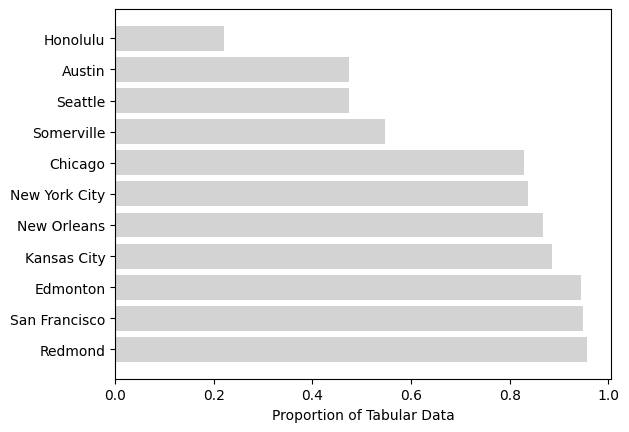

In [27]:
# FIG 3
sorted_data = sorted(zip(tabular_city_percent, cities), reverse=True)
sorted_tabular_city_percent, sorted_cities = zip(*sorted_data)

plt.rcParams['axes.facecolor'] = 'white'
plt.barh(sorted_cities, sorted_tabular_city_percent, color="lightgrey")
plt.xlabel('Proportion of Tabular Data')
plt.show()

In [28]:
# create ids_txt for each city
for domain in domains:
    with open(domain.split('.')[1] + '_ids.txt','w') as output_file:
        with open(domain.split('.')[1] + "_filetype.txt", 'r') as file:
            for lines in file:
                # print(lines.split(' - ')[0])
                output_file.write(lines.split(' - ')[0] + "\n")

In [103]:
# Part 1 -- create rows_count.txt  for each city, will take 2-3 hours to run
import requests

for domain in domains:
    filename = domain.split('.')[1] + '_ids.txt'
    with open(domain.split('.')[1] + '_rows_count.txt','w') as output_file:
        with open(filename, 'r') as file:
            lines = file.readlines()
        for line in lines:
            report_id = line.strip()
            url = f"https://{domain}/resource/{report_id}.json?$select=count(*)"
            try:
                response = requests.get(url)
                if response.status_code == 200:
                    data = response.json()
                    if data and 'count' in data[0]:
                        count = data[0]['count']
                        output_file.write(f"{report_id} - {count}\n")
                    else:
                        output_file.write(f"{report_id} - Count Not Applicable\n")
                else:
                    output_file.write(f"{report_id} - Error {response.status_code}\n")
            except Exception as e:
                output_file.write(f"{report_id} - Exception: {str(e)}\n")

In [104]:
# Table 2
# Part 2 generating statistics
_1k = 0
_10k = 0
_100k = 0
_1m = 0
_10m = 0
_more = 0
total = 0

for domain in domains:
  with open(domain.split('.')[1]+'_rows_count.txt','r') as input_file:
      lines = input_file.readlines()
      for line in lines:
          entry = line.strip()
          if 'Error' in entry or 'Exception' in entry or 'Count' in entry:
              continue
          count = int(entry.split(' - ')[1])
          total += 1
          if count <= 1000:
              _1k += 1
          elif count <= 10000:
              _10k += 1
          elif count <= 100000:
              _100k += 1
          elif count <= 1000000:
              _1m += 1
          elif count <= 10000000:
              _10m += 1
          else:
              _more += 1

print(f"{'0 - 1K':<10}\t{_1k:<5}\t{(_1k/total * 100):.2f}%")
print(f"{'1K - 10K':<10}\t{_10k:<5}\t{(_10k/total * 100):.2f}%")
print(f"{'10K - 100K':<10}\t{_100k:<5}\t{(_100k/total * 100):.2f}%")
print(f"{'100K - 1M':<10}\t{_1m:<5}\t{(_1m/total * 100):.2f}%")
print(f"{'1M - 10M':<10}\t{_10m:<5}\t{(_10m/total * 100):.2f}%")
print(f"{'>10M':<10}\t{_more:<5}\t{(_more/total * 100):.2f}%")

0 - 1K    	4138 	48.99%
1K - 10K  	1966 	23.27%
10K - 100K	904  	10.70%
100K - 1M 	611  	7.23%
1M - 10M  	712  	8.43%
>10M      	116  	1.37%


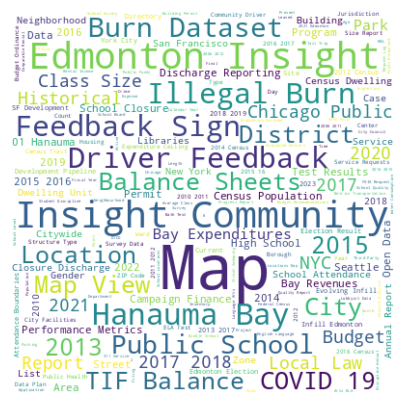

In [29]:
# FIG 4 - All cities
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain

keywords =""
for domain in domains:
  url = "https://api.us.socrata.com/api/catalog/v1"
  params = {
      "domains": domain,
      "search_context": domain,
      "limit": 5000
  }

  response = requests.get(url, params=params)
  data = response.json()

  for item in data['results']:
    keyword = item['resource']['name']
    keywords += keyword +" "


wordcloud = WordCloud(width=400, height=400, background_color='white', include_numbers = True).generate(keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

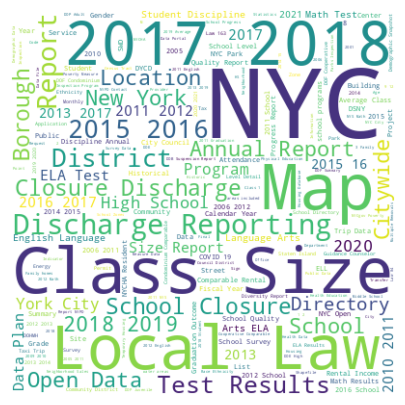

In [30]:
# FIG 4 - NYC
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.cityofnewyork.us"
keywords =""
params = {
    "domains": domain,
    "search_context": domain,
    "limit": 5000
}
response = requests.get(url, params=params)
data = response.json()
for item in data['results']:
  keyword = item['resource']['name']
  keywords += keyword +" "

wordcloud = WordCloud(width=400, height=400, background_color='white', include_numbers = True).generate(keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

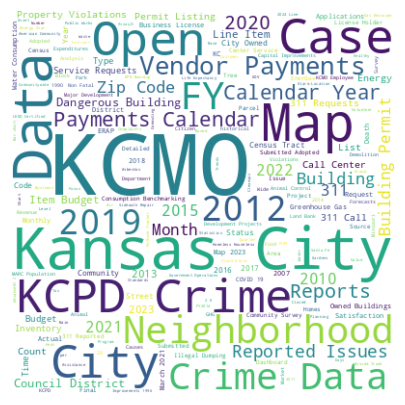

In [31]:
# FIG 4 - Kansas City
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.kcmo.org"
keywords =""
params = {
    "domains": domain,
    "search_context": domain,
    "limit": 5000
}
response = requests.get(url, params=params)
data = response.json()

for item in data['results']:
  keyword = item['resource']['name']
  keywords += keyword +" "

wordcloud = WordCloud(width=400, height=400, background_color='white', include_numbers = True).generate(keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

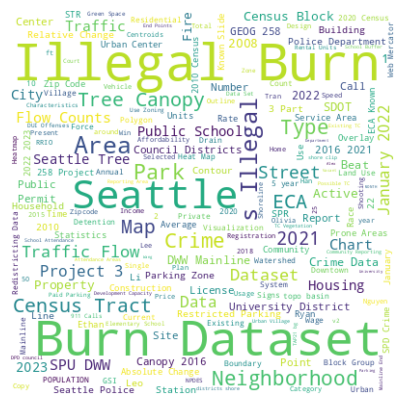

In [32]:
# FIG 4 - Seattle
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.seattle.gov"
keywords =""
params = {
    "domains": domain,
    "search_context": domain,
    "limit": 5000
}
response = requests.get(url, params=params)
data = response.json()

for item in data['results']:
  keyword = item['resource']['name']
  keywords += keyword +" "

wordcloud = WordCloud(width=400, height=400, background_color='white', include_numbers = True).generate(keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

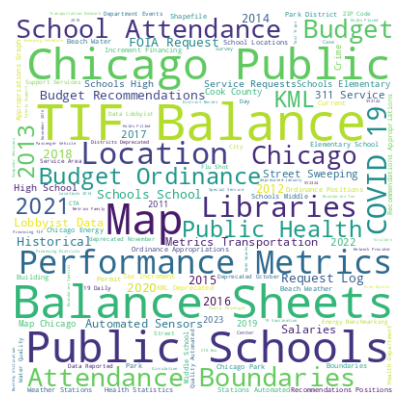

In [33]:
# FIG 4 - Chicago
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.cityofchicago.org"
keywords =""
params = {
    "domains": domain,
    "search_context": domain,
    "limit": 5000
}
response = requests.get(url, params=params)
data = response.json()

for item in data['results']:
  keyword = item['resource']['name']
  keywords += keyword +" "

wordcloud = WordCloud(width=400, height=400, background_color='white', include_numbers = True).generate(keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

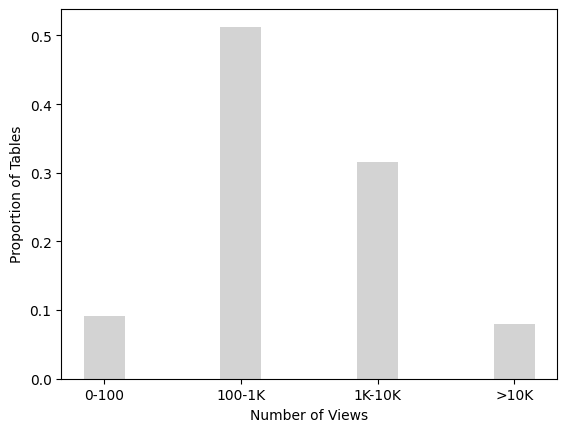

In [34]:
# FIG 5 - a
import pandas as pd

csv_file_path = 'dataset.csv'

data = {'0-100': 0,
        '100-1K': 0,
        '1K-10K': 0,
        '>10K': 0,
       }
count = 0

with open(csv_file_path, mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
      if lines[1] == "databases":
          continue
      if lines[3] == "0":
          continue
      else:
          url = "https://api.us.socrata.com/api/catalog/v1"
          domain = lines[4]
          params = {
              "domains": domain,
              "search_context": domain,
              "limit": 5000
          }
          response = requests.get(url, params=params)
          data2 = response.json()
          for item in data2['results']:
              if item['resource']['page_views']['page_views_total'] <= 100:
                  data['0-100'] += 1
              elif item['resource']['page_views']['page_views_total'] <= 1000:
                  data['100-1K'] += 1
              elif item['resource']['page_views']['page_views_total'] <= 10000:
                  data['1K-10K'] += 1
              else:
                  data['>10K'] += 1
              count += 1

categories = []
values = []
for k,v in data.items():
  categories.append(k)
  values.append(v / count)

plt.rcParams['axes.facecolor'] = 'white'
plt.bar(categories, values, color='lightgrey', width = 0.3)
plt.xlabel('Number of Views')
plt.ylabel('Proportion of Tables')
plt.show()


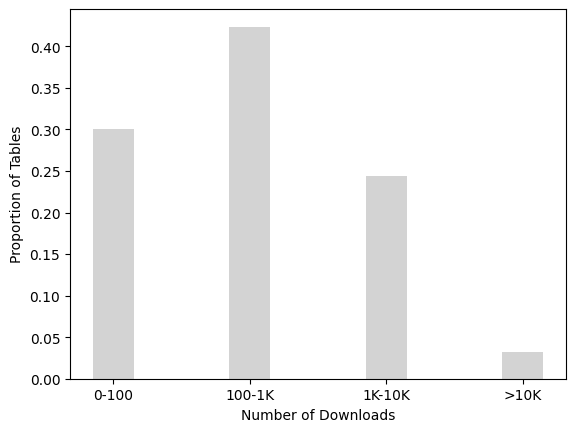

In [35]:
# FIG 5 - b
import pandas as pd

csv_file_path = 'dataset.csv'

data = {'0-100': 0,
        '100-1K': 0,
        '1K-10K': 0,
        '>10K': 0,
       }
count = 0

with open(csv_file_path, mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
      if lines[1] == "databases":
          continue
      if lines[3] == "0":
          continue
      else:
          url = "https://api.us.socrata.com/api/catalog/v1"
          domain = lines[4]
          params = {
              "domains": domain,
              "search_context": domain,
              "limit": 5000
          }

          response = requests.get(url, params=params)
          data2 = response.json()
          for item in data2['results']:
              if item['resource']['download_count'] <= 100:
                  data['0-100'] += 1
              elif item['resource']['download_count'] <= 1000:
                  data['100-1K'] += 1
              elif item['resource']['download_count'] <= 10000:
                  data['1K-10K'] += 1
              else:
                  data['>10K'] += 1
              count += 1

categories = []
values = []
for k,v in data.items():
  categories.append(k)
  values.append(v / count)

plt.rcParams['axes.facecolor'] = 'white'
plt.bar(categories, values, color='lightgrey', width = 0.3)
plt.xlabel('Number of Downloads')
plt.ylabel('Proportion of Tables')
plt.show()


In [37]:
# Calculate most popular datasets
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
url = "https://api.us.socrata.com/api/catalog/v1"
months_count = {}
download_counts = []
for domain in domains:
  params = {
      "domains": domain,
      "search_context": domain,
      "limit": 5000
  }

  response = requests.get(url, params=params)
  data = response.json()
  today = datetime.today()
  for item in data['results']:
      download_counts.append(item['resource']['download_count'])



In [38]:
# Calculate most popular datasets
sorted_download_counts = sorted(download_counts, reverse=True)
top_100_threshold = sorted_download_counts[100]
top_500_threshold = sorted_download_counts[500]
top_1000_threshold = sorted_download_counts[1000]

In [39]:
# Calculate most popular datasets
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta

keywords_100 = ""
keywords_500 = ""
keywords_1000 = ""
url = "https://api.us.socrata.com/api/catalog/v1"
months_count = {}
download_counts = []
for domain in domains:
  params = {
      "domains": domain,
      "search_context": domain,
      "limit": 5000
  }

  response = requests.get(url, params=params)
  data = response.json()
  today = datetime.today()
  for item in data['results']:
      if (item['resource']['download_count']) > top_1000_threshold:
        keywords_1000 += item['resource']['name'] + " "
      if (item['resource']['download_count']) > top_500_threshold:
        keywords_500 += item['resource']['name'] + " "
      if (item['resource']['download_count']) > top_100_threshold:
        keywords_100 += item['resource']['name'] + " "



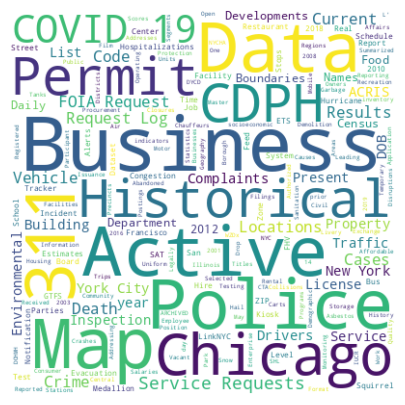

In [40]:
# FIG 6 - a
wordcloud = WordCloud(width=400, height=400, background_color='white', include_numbers = True).generate(keywords_100)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

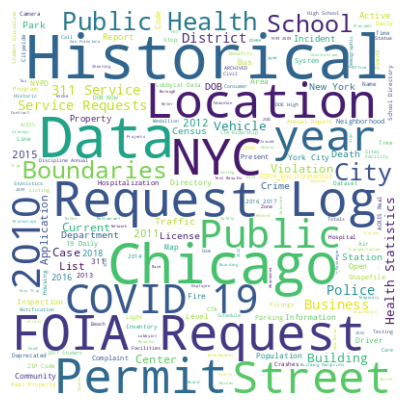

In [41]:
# FIG 6 - b
wordcloud = WordCloud(width=400, height=400, background_color='white', include_numbers = True).generate(keywords_500)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

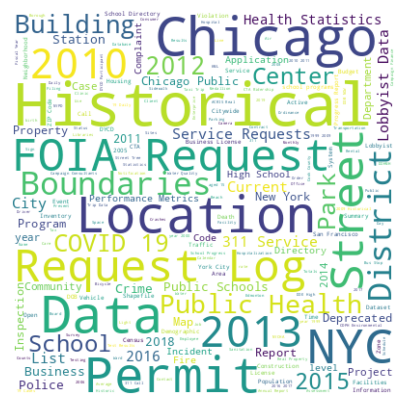

In [42]:
# FIG 6 - c
wordcloud = WordCloud(width=400, height=400, background_color='white', include_numbers = True).generate(keywords_1000)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [43]:
# Calculate age of data sets based on creation date
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
url = "https://api.us.socrata.com/api/catalog/v1"

months_count = {}

for domain in domains:
  params = {
      "domains": domain,
      "search_context": domain,
      "limit": 5000
  }

  response = requests.get(url, params=params)
  data = response.json()
  today = datetime.today()
  count = 0;
  for item in data['results']:
      date = datetime.fromisoformat(item['resource']['createdAt'].replace('Z', '000'))
      # print(date)
      delta = relativedelta(today, date)
      # print(delta)
      months_between = delta.years * 12 + delta.months
      if months_between in months_count:
        months_count[months_between] += 1
      else:
        months_count[months_between] = 1


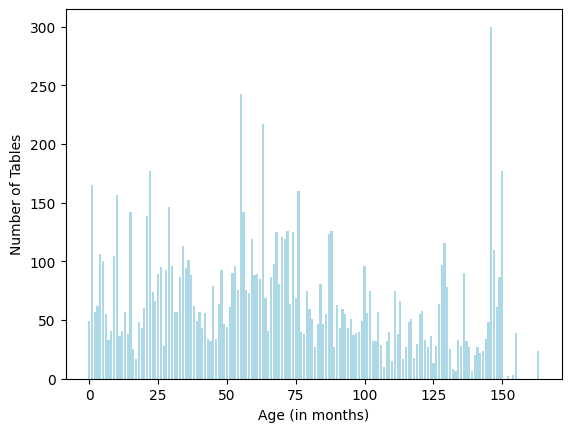

In [44]:
# FIG 7
sorted_months_count = dict(sorted(months_count.items(), key=lambda x: x[1], reverse=True))
sorted_dates = list(sorted_months_count.keys())
sorted_counts = list(sorted_months_count.values())

plt.bar(sorted_dates, sorted_counts, color="lightblue")
plt.xlabel('Age (in months)')
plt.ylabel('Number of Tables')
plt.show()

In [45]:
# Calculate Number of Attributes
import requests
from datetime import datetime
from dateutil.relativedelta import relativedelta
url = "https://api.us.socrata.com/api/catalog/v1"
attributes_count = []
for domain in domains:
  params = {
      "domains": domain,
      "search_context": domain,
      "limit": 5000
  }

  response = requests.get(url, params=params)
  data = response.json()
  for item in data['results']:
      attributes_count.append(len(item['resource']['columns_name']))

In [46]:
# Calculate Number of Attributes
total_tables = len(attributes_count)
a0_10 = 0
a10_20 = 0
a20_30 = 0
a30_40 = 0
a40 = 0
for item in attributes_count:
  if item <= 10:
    a0_10 += 1
  elif item <= 20:
    a10_20 += 1
  elif item <= 30:
    a20_30 += 1
  elif item <= 40:
    a30_40 += 1
  else:
    a40 += 1
x=["0-10", "10-20", "20-30", "30-40", ">40"]
y=[a0_10 / total_tables, a10_20 / total_tables, a20_30 / total_tables, a30_40 / total_tables, a40 / total_tables]

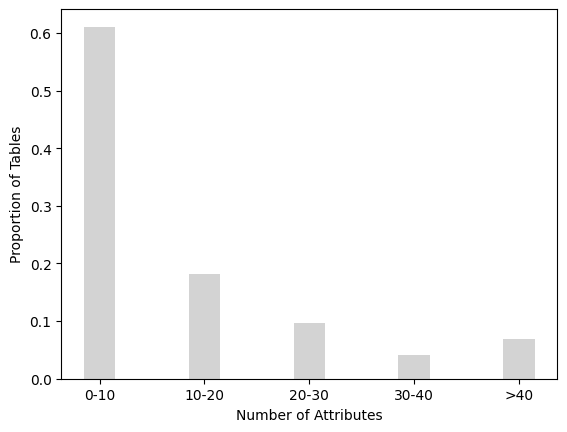

In [47]:
# FIG 9
plt.rcParams['axes.facecolor'] = 'white'
plt.bar(x, y, color='lightgrey', width = 0.3)
plt.xlabel('Number of Attributes')
plt.ylabel('Proportion of Tables')
plt.show()

In [48]:
# Calculation
import requests
from datetime import datetime
url = "https://api.us.socrata.com/api/catalog/v1"

year_count = {}
year2_count = {}
count = 0;
for domain in domains:
  params = {
      "domains": domain,
      "search_context": domain,
      "limit": 5000
  }

  response = requests.get(url, params=params)
  data = response.json()

  for item in data['results']:
      year = datetime.fromisoformat(item['resource']['createdAt'].replace('Z', '+00:00')).year
      year2 = datetime.fromisoformat(item['resource']['updatedAt'].replace('Z', '+00:00')).year
      if year >= 2014 and year <= 2023:
          if year in year_count:
              year_count[year] += 1
          else:
              year_count[year] = 1
          if year2 in year2_count:
              year2_count[year2] += 1
          else:
              year2_count[year2] = 1
          count = count + 1

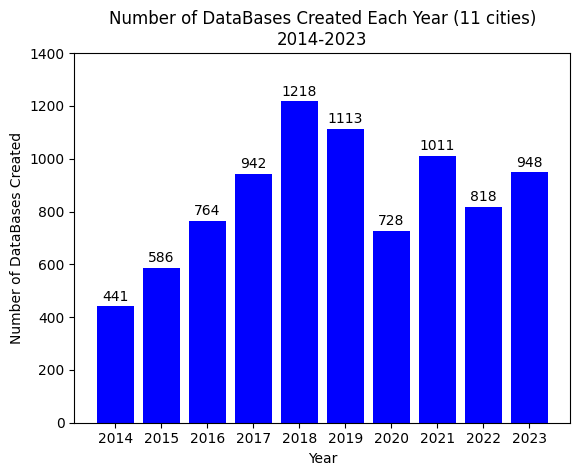

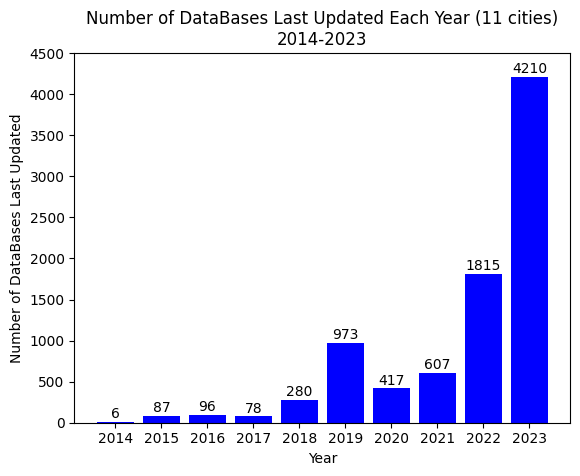

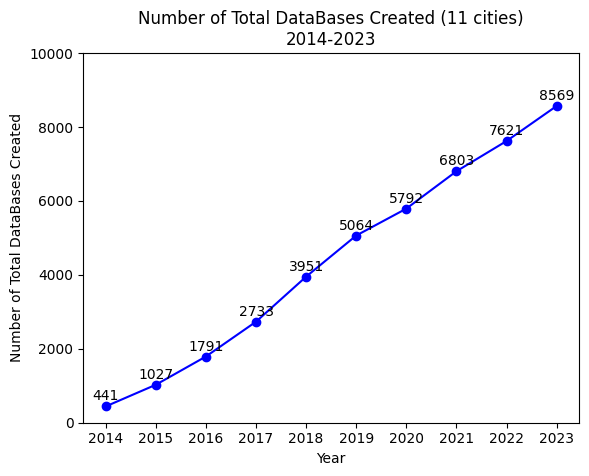

In [50]:
# Create Graphs (11 cities (2014-2023))
import matplotlib.pyplot as plt
years = list(year_count.keys())
counts = list(year_count.values())
all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
plt.bar(years, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of DataBases Created')
plt.title('Number of DataBases Created Each Year (11 cities)'+ '\n' + "2014-2023")
for year, count in zip(years, counts):
    plt.text(year, count + 10, str(count), ha='center', va='bottom')
plt.ylim(0,1400)
plt.show()

years = list(year2_count.keys())
counts = list(year2_count.values())
all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
plt.bar(years, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of DataBases Last Updated')
plt.title('Number of DataBases Last Updated Each Year (11 cities)' + '\n' + "2014-2023")
for year, count in zip(years, counts):
    plt.text(year, count + 10, str(count), ha='center', va='bottom')
plt.ylim(0,4500)
plt.show()

all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
sorted_years = sorted(year_count.keys())
accumulated_sum = [sum(year_count[year] for year in sorted_years[:i+1]) for i in range(len(sorted_years))]
plt.plot(sorted_years, accumulated_sum, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Total DataBases Created')
plt.title('Number of Total DataBases Created (11 cities)' + '\n' + "2014-2023")
for year, total_count in zip(sorted_years, accumulated_sum):
    plt.text(year, total_count + 80, str(total_count), ha='center', va='bottom')
plt.ylim(0,10000)
plt.show()

In [52]:
# Calculation
import requests
from datetime import datetime
url = "https://api.us.socrata.com/api/catalog/v1"
# domain = "data.cityofnewyork.us"
year_count = {}
year2_count = {}
count = 0;

for domain in domains:

  params = {
      "domains": domain,
      "search_context": domain,
      "limit": 5000
  }

  response = requests.get(url, params=params)
  data = response.json()

  for item in data['results']:
      year = datetime.fromisoformat(item['resource']['createdAt'].replace('Z', '+00:00')).year
      year2 = datetime.fromisoformat(item['resource']['updatedAt'].replace('Z', '+00:00')).year
      if year in year_count:
          year_count[year] += 1
      else:
          year_count[year] = 1
      if year2 in year2_count:
          year2_count[year2] += 1
      else:
          year2_count[year2] = 1
      count = count + 1

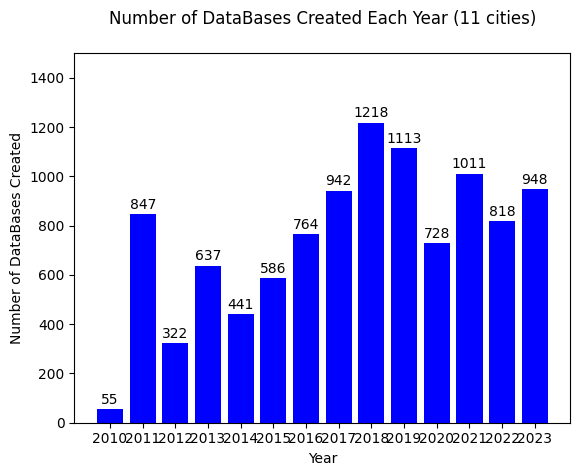

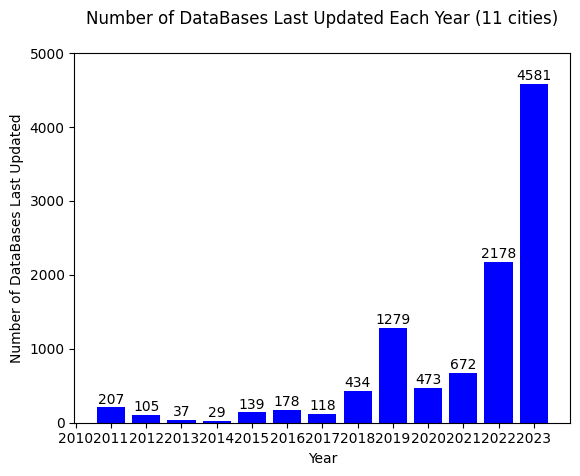

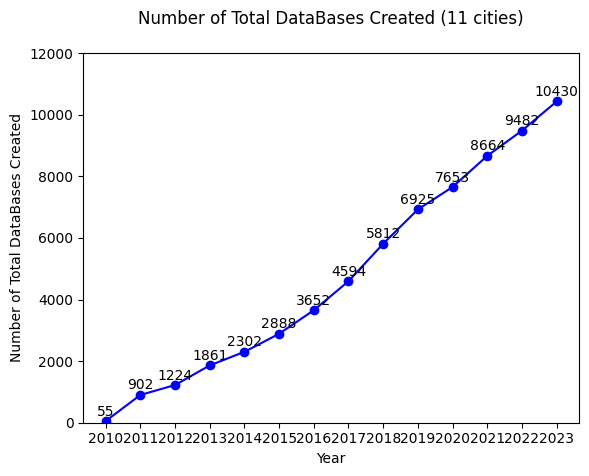

In [53]:
# Create Graphs (11 cities (all))
import matplotlib.pyplot as plt
years = list(year_count.keys())
counts = list(year_count.values())
all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
plt.bar(years, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of DataBases Created')
plt.title('Number of DataBases Created Each Year (11 cities)'+ '\n')
for year, count in zip(years, counts):
    plt.text(year, count + 10, str(count), ha='center', va='bottom')
plt.ylim(0,1500)
plt.show()

years = list(year2_count.keys())
counts = list(year2_count.values())
all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
plt.bar(years, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of DataBases Last Updated')
plt.title('Number of DataBases Last Updated Each Year (11 cities)' + '\n')
for year, count in zip(years, counts):
    plt.text(year, count + 10, str(count), ha='center', va='bottom')
plt.ylim(0,5000)
plt.show()

all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
sorted_years = sorted(year_count.keys())
accumulated_sum = [sum(year_count[year] for year in sorted_years[:i+1]) for i in range(len(sorted_years))]
plt.plot(sorted_years, accumulated_sum, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Total DataBases Created')
plt.title('Number of Total DataBases Created (11 cities)' + '\n')
for year, total_count in zip(sorted_years, accumulated_sum):
    plt.text(year, total_count + 80, str(total_count), ha='center', va='bottom')
plt.ylim(0,12000)
plt.show()

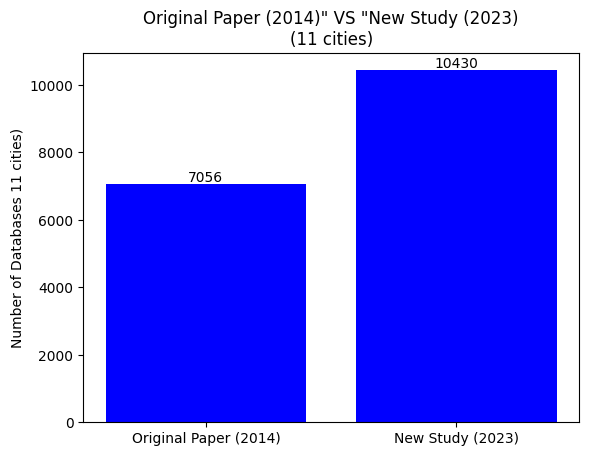

In [57]:
# Compare(11 cities)
import matplotlib.pyplot as plt
import requests
from datetime import datetime
url = "https://api.us.socrata.com/api/catalog/v1"

count = 0;

for domain in domains:
  params = {
      "domains": domain,
      "search_context": domain,
      "limit": 5000
  }

  response = requests.get(url, params=params)
  data = response.json()

  for item in data['results']:
      count = count + 1

categories = ['Original Paper (2014)', 'New Study (2023)']
values = [216+954+395+66+682+1044+2411+66+81+1132+9,count]

plt.bar(categories, values, color='blue')
plt.ylabel('Number of Databases 11 cities)')
plt.title('Original Paper (2014)" VS "New Study (2023)\n(11 cities)')

for i, value in enumerate(values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.show()

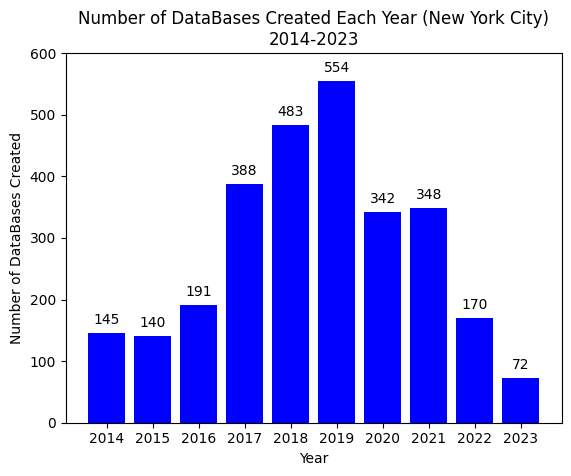

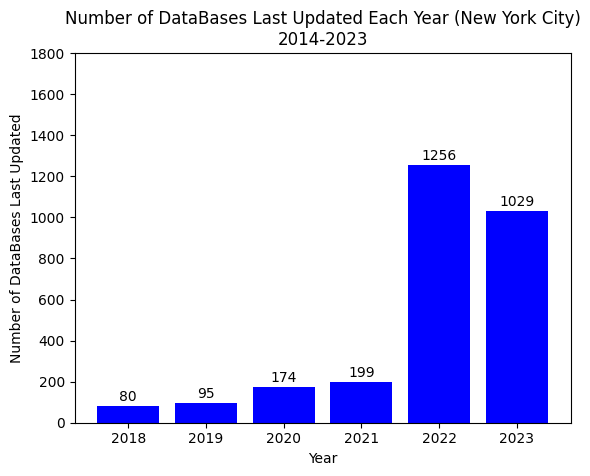

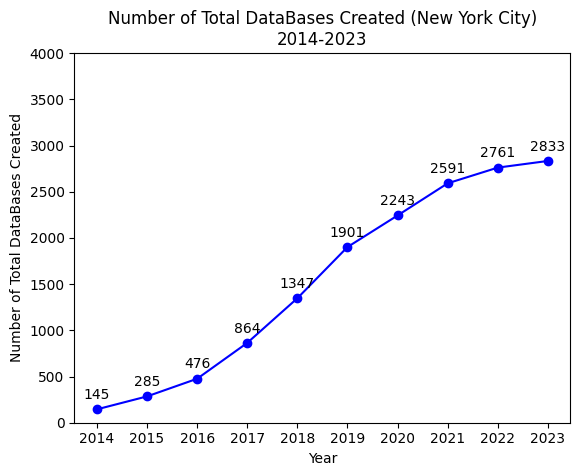

In [54]:
# Create Graphs (New York City (2014-2023))
import requests
from datetime import datetime
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.cityofnewyork.us"

params = {
    "domains": domain,
    "search_context": domain,
    "limit": 5000
}

response = requests.get(url, params=params)
data = response.json()
year_count = {}
year2_count = {}
count = 0;
for item in data['results']:
    year = datetime.fromisoformat(item['resource']['createdAt'].replace('Z', '+00:00')).year
    year2 = datetime.fromisoformat(item['resource']['updatedAt'].replace('Z', '+00:00')).year
    if year >= 2014 and year <= 2023:
        if year in year_count:
            year_count[year] += 1
        else:
            year_count[year] = 1
        if year2 in year2_count:
            year2_count[year2] += 1
        else:
            year2_count[year2] = 1
        count = count + 1

import matplotlib.pyplot as plt
years = list(year_count.keys())
counts = list(year_count.values())
all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
plt.bar(years, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of DataBases Created')
plt.title('Number of DataBases Created Each Year (New York City)'+ '\n' + "2014-2023")
for year, count in zip(years, counts):
    plt.text(year, count + 10, str(count), ha='center', va='bottom')
plt.ylim(0,600)
plt.show()

years = list(year2_count.keys())
counts = list(year2_count.values())
all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
plt.bar(years, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of DataBases Last Updated')
plt.title('Number of DataBases Last Updated Each Year (New York City)' + '\n' + "2014-2023")
for year, count in zip(years, counts):
    plt.text(year, count + 10, str(count), ha='center', va='bottom')
plt.ylim(0,1800)
plt.show()

all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
sorted_years = sorted(year_count.keys())
accumulated_sum = [sum(year_count[year] for year in sorted_years[:i+1]) for i in range(len(sorted_years))]
plt.plot(sorted_years, accumulated_sum, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Total DataBases Created')
plt.title('Number of Total DataBases Created (New York City)' + '\n' + "2014-2023")
for year, total_count in zip(sorted_years, accumulated_sum):
    plt.text(year, total_count + 80, str(total_count), ha='center', va='bottom')
plt.ylim(0,4000)
plt.show()

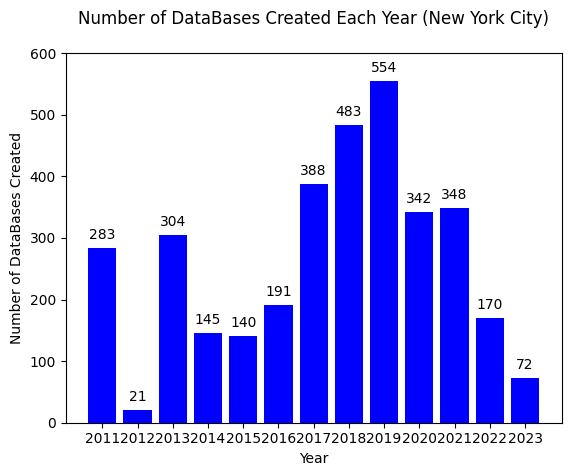

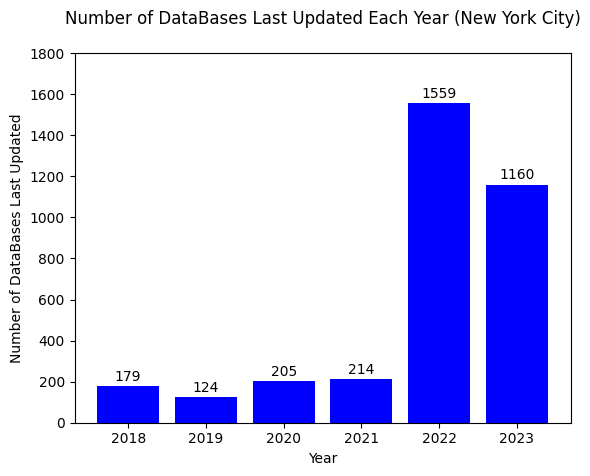

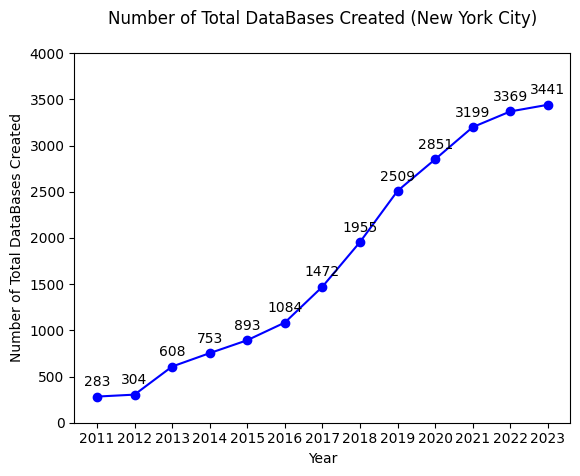

In [55]:
# Create Graphs (New York City (all))
import requests
from datetime import datetime
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.cityofnewyork.us"

params = {
    "domains": domain,
    "search_context": domain,
    "limit": 5000
}

response = requests.get(url, params=params)
data = response.json()

year_count = {}
year2_count = {}
count = 0;
for item in data['results']:
    year = datetime.fromisoformat(item['resource']['createdAt'].replace('Z', '+00:00')).year
    year2 = datetime.fromisoformat(item['resource']['updatedAt'].replace('Z', '+00:00')).year
    if year in year_count:
        year_count[year] += 1
    else:
        year_count[year] = 1
    if year2 in year2_count:
        year2_count[year2] += 1
    else:
        year2_count[year2] = 1
    count = count + 1

import matplotlib.pyplot as plt
years = list(year_count.keys())
counts = list(year_count.values())
all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
plt.bar(years, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of DataBases Created')
plt.title('Number of DataBases Created Each Year (New York City)'+ '\n')
for year, count in zip(years, counts):
    plt.text(year, count + 10, str(count), ha='center', va='bottom')
plt.ylim(0,600)
plt.show()

years = list(year2_count.keys())
counts = list(year2_count.values())
all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
plt.bar(years, counts, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of DataBases Last Updated')
plt.title('Number of DataBases Last Updated Each Year (New York City)' + '\n')
for year, count in zip(years, counts):
    plt.text(year, count + 10, str(count), ha='center', va='bottom')
plt.ylim(0,1800)
plt.show()

all_years = range(min(year_count.keys()), max(year_count.keys()) + 1)
plt.xticks(all_years)
sorted_years = sorted(year_count.keys())
accumulated_sum = [sum(year_count[year] for year in sorted_years[:i+1]) for i in range(len(sorted_years))]
plt.plot(sorted_years, accumulated_sum, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Total DataBases Created')
plt.title('Number of Total DataBases Created (New York City)' + '\n')
for year, total_count in zip(sorted_years, accumulated_sum):
    plt.text(year, total_count + 80, str(total_count), ha='center', va='bottom')
plt.ylim(0,4000)
plt.show()

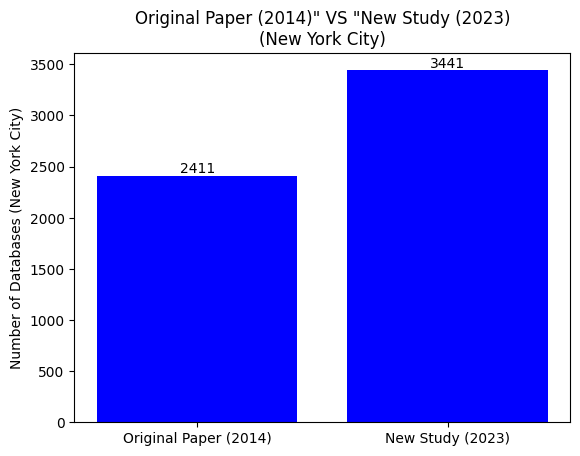

In [2]:
# Compare(New York City)
import matplotlib.pyplot as plt
import requests
from datetime import datetime
url = "https://api.us.socrata.com/api/catalog/v1"
domain = "data.cityofnewyork.us"

params = {
    "domains": domain,
    "search_context": domain,
    "limit": 5000
}

response = requests.get(url, params=params)
data = response.json()

count = 0;
for item in data['results']:
    count = count + 1

categories = ['Original Paper (2014)', 'New Study (2023)']
values = [2411,count]

plt.bar(categories, values, color='blue')
plt.ylabel('Number of Databases (New York City)')
plt.title('Original Paper (2014)" VS "New Study (2023)\n(New York City)')

for i, value in enumerate(values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.show()